# Projeto Posicionamento Covid

## 1 - Usando GPU Colaborativo (se disponível)

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
import torch
from torch.utils.data import Dataset, DataLoader

# Se houver uma GPU
if torch.cuda.is_available():
    
    # Use o GPU
    device = torch.device("cuda")
    
    print("Existem %d GPU(s) disponíveis.") # torch.cuda.device_cour
    
    print("We will use the GPU:", torch.cuda.get_device_name(0))

# Se não

else:
    print("Não há uma GPU disponível, utilizando a CPU")
    device = torch.device("cpu")

Existem %d GPU(s) disponíveis.
We will use the GPU: Tesla T4


## 1.2 - Instalando a biblioteca do Hugging Face

In [49]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
# Ajeitando os pacotes da biblioteca transformers

from transformers import BertForSequenceClassification, BertTokenizer, pipeline

## 2 - Banco de dados

In [51]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

df1 = pd.read_excel('/content/drive/MyDrive/Matéria ML 2022 2/tweets_prefeitos_2020_completo_capitais_versao_final.xlsx') 

df1

,date_post,author_id,username,name_candidate,gender,party_id,followers,media,tweet_id,content,message_type,is_quote,is_reply,is_retweet,likes,quotes,replies,retweets,terms,vaccine_brand,post_vaccine,positions_vac,mandatory_vaccines,positions_mandatory_vaccines,endorse_president,align_president,mentions_president,president_terms,category,subcategory,status_url,hashtags,state,city
0,2020-03-19,1.836349e+08,@EdmilsonPSOL,Edmilson Rodrigues,M,PSOL,84423.0,Twitter,1.240808e+18,Tenho duas amigas doutorandas na USP. Não estã...,Text,0.0,0.0,1.0,55115.0,427.0,340.0,10669.0,Vacina,NaN,1.0,1.0,0.0,NaN,0.0,0.0,0.0,NaN,Ensaios clínicos da vacina,Testes da vacina,https://twitter.com/EdmilsonPSOL/status/124080...,NaN,PA,Belém
1,2020-03-20,1.836349e+08,@EdmilsonPSOL,Edmilson Rodrigues,M,PSOL,84423.0,Twitter,1.241121e+18,"Senado: Promulgado artigo que protege IBGE, Em...",Text/Link,0.0,0.0,1.0,12.0,2.0,0.0,4.0,Fiocruz,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,https://twitter.com/EdmilsonPSOL/status/124112...,NaN,PA,Belém
2,2020-03-22,1.836349e+08,@EdmilsonPSOL,Edmilson Rodrigues,M,PSOL,84423.0,Twitter,1.241825e+18,ATENÇÃO: programem-se para a vacinação contra ...,Text/Photo,0.0,0.0,0.0,14.0,1.0,0.0,5.0,Vacinação,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,https://twitter.com/EdmilsonPSOL/status/124182...,NaN,PA,Belém
3,2020-09-01,1.836349e+08,@EdmilsonPSOL,Edmilson Rodrigues,M,PSOL,84423.0,Twitter,1.300919e+18,Chega a ser inacreditável que o governo esteja...,Text,0.0,0.0,0.0,113.0,2.0,8.0,13.0,Vacinação,NaN,1.0,1.0,0.0,NaN,0.0,0.0,1.0,Governo,Governos nacionais ou subnacionais,Críticas ao governo Bolsonaro,https://twitter.com/EdmilsonPSOL/status/130091...,NaN,PA,Belém
4,2020-10-21,1.836349e+08,@EdmilsonPSOL,Edmilson Rodrigues,M,PSOL,84423.0,Twitter,1.319042e+18,"Como prefeito, vamos garantir através da Prefe...",Text,0.0,0.0,0.0,406.0,9.0,6.0,47.0,Vacinas,NaN,1.0,1.0,0.0,NaN,0.0,0.0,0.0,NaN,Operacionalização da vacinação,Plano de vacinação,https://twitter.com/EdmilsonPSOL/status/131904...,covid19,PA,Belém
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,2020-12-20,1.022319e+18,@ViniMiguelRO,Vinicius Miguel,M,CIDADANIA,4495.0,Twitter,1.340489e+18,A cobertura vacinal contra febre aftosa em Ron...,Text/Link,1.0,1.0,1.0,194.0,4.0,6.0,30.0,Vacina,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,https://twitter.com/ViniMiguelRO/status/134048...,NaN,RO,Porto Velho
2052,2020-03-23,2.778766e+07,@Virmondes,Virmondes Cruvinel,M,CIDADANIA,8117.0,Twitter,1.242193e+18,⚠️Melhoria na vacinação em Goiânia já! https:/...,Text/Video,1.0,1.0,1.0,3.0,0.0,0.0,0.0,Vacinação,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Governos nacionais ou subnacionais,Críticas aos governadores/prefeitos; Disputa e...,https://twitter.com/Virmondes/status/124219264...,NaN,GO,Goiânia
2053,2020-03-27,2.778766e+07,@Virmondes,Virmondes Cruvinel,M,CIDADANIA,8117.0,Twitter,1.243619e+18,✅VACINAÇÃO \nEnviei ofício à Secretaria Munici...,Text/Photo,1.0,1.0,1.0,3.0,0.0,0.0,1.0,Vacinação,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Governos nacionais ou subnacionais,Críticas aos governadores/prefeitos; Disputa e...,https://twitter.com/Virmondes/status/124361871...,NaN,GO,Goiânia
2054,2020-04-16,2.778766e+07,@Virmondes,Virmondes Cruvinel,M,CIDADANIA,8117.0,Twitter,1.250858e+18,"✅H1N1\n\nApresentei, durante sessão online da ...",Text/Photo,1.0,1.0,1.0,2.0,0.0,0.0,0.0,Vacinação,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Governos nacionais ou subnacionais,Disputa eleitoral/Disputa política,https://twitter.com/Virmondes/status/125085798...,menosDiscurso; maisAu00e7u00e3o,GO,Goiânia


In [52]:
df2 = pd.read_excel('/content/drive/MyDrive/Matéria ML 2022 2/tweets_2021.xlsx') 

df2

,id,id_amostra,date_post,author_id,username,name_candidate,gender,party_id,followers,media,tweet_id,content,message_type,is_quote,is_reply,is_retweet,likes,quotes,replies,retweets,terms,vaccine_brand,post_vaccine,positions_vac,mandatory_vaccines,positions_mandatory_vaccines,endorse_president,align_president,mentions_president,president_terms,category,subcategory,status_url,hashtags,state,city,post_vaccine_predito,positions_vac_predito
0,1,9289.0,2021-01-07,7.624028e+17,@GuilhermeBoulos,Guilherme Boulos,M,PSOL,1717024.0,Twitter,1.347219e+18,Vacina da CORONAVAC tem 78% de eficácia. Antes...,Text,0.0,0.0,0.0,60529.0,280.0,273.0,4785.0,NaN,NaN,1.0,1.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,https://twitter.com/GuilhermeBoulos/status/134...,NaN,SP,São Paulo,1.0,1.0
1,2,1251.0,2021-06-19,7.506003e+07,@dasilvabenedita,Benedita Da Silva,F,PT,180246.0,Twitter,1.406308e+18,Estamos aqui no #19JForaBolsonaro e vamos ocup...,Video/Link,0.0,0.0,0.0,510.0,5.0,9.0,86.0,NaN,NaN,1.0,1.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,https://twitter.com/dasilvabenedita/status/140...,19JForaBolsonaro,RJ,Rio de Janeiro,1.0,1.0
2,3,15505.0,2021-03-27,1.424189e+08,@sartoprefeito12,Sarto,M,PDT,18395.0,Twitter,1.375810e+18,"Gente, já somos mais de 200 mil vacinados cont...",Video/Link,0.0,0.0,0.0,85.0,0.0,5.0,5.0,NaN,NaN,1.0,1.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,https://twitter.com/sartoprefeito12/status/137...,NaN,CE,Fortaleza,1.0,1.0
3,4,8825.0,2021-06-02,7.480176e+07,@GeanLoureiro,Gean,M,DEM,48539.0,Twitter,1.400181e+18,ATENÇÃO: vacinação de pessoas com 58 e 59 anos...,Video/Link,0.0,0.0,0.0,760.0,32.0,50.0,73.0,NaN,NaN,1.0,2.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,https://twitter.com/GeanLoureiro/status/140018...,NaN,SC,Florianópolis,0.0,1.0
4,5,10288.0,2021-12-24,5.204537e+07,@jilmartatto,Jilmar Tatto,M,PT,27047.0,Twitter,1.474438e+18,Meus melhores votos de Natal para as crianças ...,Text,0.0,0.0,1.0,12041.0,47.0,357.0,1327.0,NaN,NaN,1.0,1.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,https://twitter.com/jilmartatto/status/1474437...,NaN,SP,São Paulo,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,12377.0,2021-06-28,9.030966e+07,@MariliaArraes,Marilia Arraes,F,PT,100539.0,Twitter,1.409593e+18,Com os depoimentos dos irmãos Miranda foi dado...,Text,0.0,0.0,0.0,564.0,2.0,45.0,108.0,NaN,NaN,1.0,1.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,https://twitter.com/MariliaArraes/status/14095...,NaN,PE,Recife,1.0,1.0
4996,4997,15665.0,2021-04-30,1.424189e+08,@sartoprefeito12,Sarto,M,PDT,18395.0,Twitter,1.388202e+18,Muitas pessoas estão questionando por que segu...,Text,0.0,0.0,0.0,76.0,0.0,10.0,1.0,NaN,NaN,1.0,2.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,https://twitter.com/sartoprefeito12/status/138...,NaN,CE,Fortaleza,1.0,1.0
4997,4998,3060.0,2021-03-19,2.319196e+09,@Adriana_Accorsi,Delegada Adriana Accorsi,F,PT,16806.0,Twitter,1.372931e+18,"Gen Heleno de MÁSCARA, tomando VACINA. Cloroqu...",Text,0.0,0.0,1.0,31862.0,110.0,403.0,3232.0,NaN,NaN,1.0,1.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,https://twitter.com/Adriana_Accorsi/status/137...,NaN,GO,Goiânia,1.0,3.0
4998,4999,16856.0,2021-10-09,3.012510e+09,@DepSheridan,Shéridan,F,PSDB,42846.0,Twitter,1.446834e+18,"As UBS Hélio Macedo, Aygara Motta, Dalmo Feito...",Text,0.0,1.0,0.0,2.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,https://twitter.com/DepSheridan/status/1446834...,NaN,RR,Boa Vista,0.0,1.0


In [53]:
df = pd.concat([df1, df2])

df

,date_post,author_id,username,name_candidate,gender,party_id,followers,media,tweet_id,content,message_type,is_quote,is_reply,is_retweet,likes,quotes,replies,retweets,terms,vaccine_brand,post_vaccine,positions_vac,mandatory_vaccines,positions_mandatory_vaccines,endorse_president,align_president,mentions_president,president_terms,category,subcategory,status_url,hashtags,state,city,id,id_amostra,post_vaccine_predito,positions_vac_predito
0,2020-03-19,1.836349e+08,@EdmilsonPSOL,Edmilson Rodrigues,M,PSOL,84423.0,Twitter,1.240808e+18,Tenho duas amigas doutorandas na USP. Não estã...,Text,0.0,0.0,1.0,55115.0,427.0,340.0,10669.0,Vacina,NaN,1.0,1.0,0.0,NaN,0.0,0.0,0.0,NaN,Ensaios clínicos da vacina,Testes da vacina,https://twitter.com/EdmilsonPSOL/status/124080...,NaN,PA,Belém,NaN,NaN,NaN,NaN
1,2020-03-20,1.836349e+08,@EdmilsonPSOL,Edmilson Rodrigues,M,PSOL,84423.0,Twitter,1.241121e+18,"Senado: Promulgado artigo que protege IBGE, Em...",Text/Link,0.0,0.0,1.0,12.0,2.0,0.0,4.0,Fiocruz,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,https://twitter.com/EdmilsonPSOL/status/124112...,NaN,PA,Belém,NaN,NaN,NaN,NaN
2,2020-03-22,1.836349e+08,@EdmilsonPSOL,Edmilson Rodrigues,M,PSOL,84423.0,Twitter,1.241825e+18,ATENÇÃO: programem-se para a vacinação contra ...,Text/Photo,0.0,0.0,0.0,14.0,1.0,0.0,5.0,Vacinação,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,https://twitter.com/EdmilsonPSOL/status/124182...,NaN,PA,Belém,NaN,NaN,NaN,NaN
3,2020-09-01,1.836349e+08,@EdmilsonPSOL,Edmilson Rodrigues,M,PSOL,84423.0,Twitter,1.300919e+18,Chega a ser inacreditável que o governo esteja...,Text,0.0,0.0,0.0,113.0,2.0,8.0,13.0,Vacinação,NaN,1.0,1.0,0.0,NaN,0.0,0.0,1.0,Governo,Governos nacionais ou subnacionais,Críticas ao governo Bolsonaro,https://twitter.com/EdmilsonPSOL/status/130091...,NaN,PA,Belém,NaN,NaN,NaN,NaN
4,2020-10-21,1.836349e+08,@EdmilsonPSOL,Edmilson Rodrigues,M,PSOL,84423.0,Twitter,1.319042e+18,"Como prefeito, vamos garantir através da Prefe...",Text,0.0,0.0,0.0,406.0,9.0,6.0,47.0,Vacinas,NaN,1.0,1.0,0.0,NaN,0.0,0.0,0.0,NaN,Operacionalização da vacinação,Plano de vacinação,https://twitter.com/EdmilsonPSOL/status/131904...,covid19,PA,Belém,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2021-06-28,9.030966e+07,@MariliaArraes,Marilia Arraes,F,PT,100539.0,Twitter,1.409593e+18,Com os depoimentos dos irmãos Miranda foi dado...,Text,0.0,0.0,0.0,564.0,2.0,45.0,108.0,NaN,NaN,1.0,1.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,https://twitter.com/MariliaArraes/status/14095...,NaN,PE,Recife,4996.0,12377.0,1.0,1.0
4996,2021-04-30,1.424189e+08,@sartoprefeito12,Sarto,M,PDT,18395.0,Twitter,1.388202e+18,Muitas pessoas estão questionando por que segu...,Text,0.0,0.0,0.0,76.0,0.0,10.0,1.0,NaN,NaN,1.0,2.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,https://twitter.com/sartoprefeito12/status/138...,NaN,CE,Fortaleza,4997.0,15665.0,1.0,1.0
4997,2021-03-19,2.319196e+09,@Adriana_Accorsi,Delegada Adriana Accorsi,F,PT,16806.0,Twitter,1.372931e+18,"Gen Heleno de MÁSCARA, tomando VACINA. Cloroqu...",Text,0.0,0.0,1.0,31862.0,110.0,403.0,3232.0,NaN,NaN,1.0,1.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,https://twitter.com/Adriana_Accorsi/status/137...,NaN,GO,Goiânia,4998.0,3060.0,1.0,3.0
4998,2021-10-09,3.012510e+09,@DepSheridan,Shéridan,F,PSDB,42846.0,Twitter,1.446834e+18,"As UBS Hélio Macedo, Aygara Motta, Dalmo Feito...",Text,0.0,1.0,0.0,2.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,https://twitter.com/DepSheridan/status/1446834...,NaN,RR,Boa Vista,4999.0,16856.0,0.0,1.0


In [54]:
df.shape

(7056, 38)

## 2.2 Analisando (parse)

In [55]:
# Extraindo as sentenças e seus valores

# Primeiro, vamos remover posts que não se referem às vacinas

df = df.drop(df[df.post_vaccine == 0].index)

# Agora nosso banco diminuiu mais ainda

print('Número de frases para treinamento: {:,}\n'.format(df.shape[0]))

# Vamos transformar noss variável de positions_vac em int
# Além disso, baseado em Brownlee (2020, p.16), irei assinalar
# a classe majoritária com 0, a intermediária com 1 e a minoritária com 2

def condicao(x):
    if x == 3.0:
        return 1
    elif x == 2.0:
        return 2
    else:
        return 0

df['positions_vac'] = df['positions_vac'].apply(condicao)

# Nos resta, para cada valor, a seguinte distribuição

print(df['positions_vac'].value_counts())

Número de frases para treinamento: 5,891

0    4007
2    1621
1     263
Name: positions_vac, dtype: int64


<ipython-input-55-78879ecfd38b>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['positions_vac'] = df['positions_vac'].apply(condicao)


<ipython-input-56-05ec692ffb80>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['positions_vac2'] = df['positions_vac'].apply(condicao2)


Text(0, 0.5, 'Count')

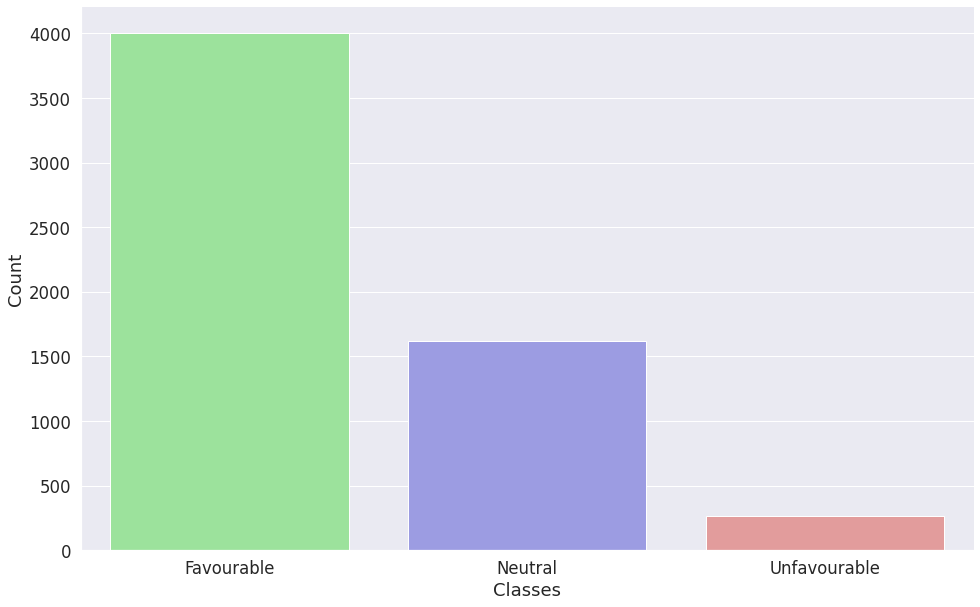

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

def condicao2(x):
    if x == 1:
        return "Unfavourable"
    elif x == 2:
        return "Neutral"
    else:
        return "Favourable"

df['positions_vac2'] = df['positions_vac'].apply(condicao2)

# Plot styling

sns.set(style = "darkgrid")

# Aumenttndo o tamanho do plot e da fonte

sns.set(font_scale = 1.5)
plt.rcParams['figure.figsize'] = (16,10)

sns.countplot(x = df['positions_vac2'],
              palette=['#90ee90',"#9090ee", "#ee9090"])

sns.despine()

plt.xlabel("Classes")
plt.ylabel("Count")


In [57]:
# Extraindo nossas sentenças e labels como numpy ndarrays

sentences = df.content.values
labels = df.positions_vac.values

print(sentences.dtype, labels.dtype)

object int64


# 3 - Tokenização e Input Formatting

## 3.1 - BERTimbau Tokenizer

In [58]:
tokenizer = BertTokenizer.from_pretrained('neuralmind/bert-base-portuguese-cased')

Downloading:   0%|          | 0.00/210k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/647 [00:00<?, ?B/s]

## 3.2 - Tokenizando o banco de dados

In [59]:
# Tamanho máximo dos tweets

max_len = 0

# Para cada sentença
for sent in sentences:
    
    # Tokenize o texto e adicione tokens de "[CLS]" e "[SEP]".
    input_ids = tokenizer.encode(sent, add_special_tokens = True)
    
    # Atualize o tamanho máximo de tweet.
    max_len = max(max_len, len(input_ids))

print('Tamanho máximo do tweet:', max_len)

# Irei estabelecer o tamanho máximo nos hiperparâmetros como 200
    

Tamanho máximo do tweet: 183


In [60]:

# Tokenizar todas as sentenças e mapeia-os aos seus respectivos IDs

input_ids = []
attention_masks = []

# Para cada sentença...
for sent in sentences:
    
    encoded_dict = tokenizer.encode_plus(sent,  # Sentenças para serem tokenizadas
                                         add_special_tokens = True, # Adicionar [CLS] e [SEP]
                                         max_length = 200, # Limitar as sentenças
                                         pad_to_max_length = True,
                                         return_attention_mask = True, # Construir attn. masks.
                                         return_tensors = 'pt', # Retornar os tensores do pytorch
                                        )
    
    # Adicionar a sentença codificada na lista.
    input_ids.append(encoded_dict['input_ids'])
    
    # Adicionar os attentions masks
    attention_masks.append(encoded_dict['attention_mask'])
    
# Converter as listas em tensores

input_ids = torch.cat(input_ids, dim = 0)
attention_masks = torch.cat(attention_masks, dim = 0)
labels = torch.tensor(labels)



Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2336: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [61]:
print(input_ids.dtype)
print(attention_masks.dtype)
print(labels.dtype)

torch.int64
torch.int64
torch.int64


## 3.4 - Organizando os dados de treino

In [62]:
# Diferentemente do tutorial (com 90% para treino e 10% para validação), 
# vou dividir em 70% para treino,20% para validação e 10% para teste 
# devido ao pouco número de observações

from torch.utils.data import TensorDataset, random_split, Subset, RandomSampler, SequentialSampler
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold

batch_size = 32

#helper function to get train and val data loaders for each fold 

def get_data_loaders(dataset):
  train_size = int(0.7 * len(dataset))
  val_size = int(0.2 * len(dataset))
  test_size = len(dataset) - (train_size + val_size)

  train_tensor, val_tensor, test_tensor = random_split(dataset, [train_size, val_size, test_size])
  
  train_dataloader = DataLoader(
      train_tensor,
      sampler = RandomSampler(train_tensor),
      batch_size = batch_size
  )

  val_dataloader = DataLoader(
      val_tensor,
      sampler = SequentialSampler(val_tensor),
      batch_size = batch_size
  )

  test_dataloader = DataLoader(
      test_tensor,
      sampler = RandomSampler(test_tensor),
      batch_size = batch_size
      
  )
  return train_dataloader, val_dataloader, test_dataloader


dataset = TensorDataset(input_ids, attention_masks, labels)


In [63]:
from torch.utils.data import TensorDataset, random_split, Subset, RandomSampler, SequentialSampler
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold

batch_size = 32


#Stratified Sampling

def stratified_data_loaders(dataset, y):

  # Split the data into training and testing sets

  train_tensor, test_tensor = train_test_split(dataset, test_size=0.1, stratify = y)

  # Split train_tensor into two

  train_tensor, val_tensor = train_test_split(dataset, test_size = 0.2, stratify = y)


  
  train_dataloader = DataLoader(
      train_tensor,
      sampler = RandomSampler(train_tensor),
      batch_size = batch_size
  )

  val_dataloader = DataLoader(
      val_tensor,
      sampler = SequentialSampler(val_tensor),
      batch_size = batch_size
  )

  test_dataloader = DataLoader(
      test_tensor,
      sampler = RandomSampler(test_tensor),
      batch_size = batch_size
      
  )
  return train_dataloader, val_dataloader, test_dataloader


# Original
dataset = TensorDataset(input_ids, attention_masks, labels)

## 4 - Treinando nosso modelo de classificação

In [64]:
# Iremos utilizar o BertForSequenceClassification do BERTimbau

from transformers import BertForSequenceClassification, AdamW, BertConfig

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def get_bert_model():
  model = BertForSequenceClassification.from_pretrained('neuralmind/bert-base-portuguese-cased',
                                                     num_labels = 3, # Classificação multi-classe (3 classes))
                                                     output_attentions = False,)
  model.cuda()
  return model


## 4.1 - Otimizadores e Definidor de Learning Rate

No apêndice A.3 do paper do BERT, os autores recomendam:

    1. Batch size: 16 ou 32;
    
    2. Learning rate (para o Adam): 5e-5, 3e-5, 2e-5;
    
    3. Número de epochs: 2,3,4
    

## 4.2 - Loop de treinamento

In [65]:
# Métricas 

from sklearn.metrics import accuracy_score, f1_score, classification_report

# Função para calcular a accuracy de nossas predições vs. labels

def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis = 1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

# Classification report
def classification_report_with_accuracy_score(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    report = classification_report(pred_flat, labels_flat, output_dict = True, zero_division = 0) 
    df_class_report = pd.DataFrame(report).transpose() 
    return df_class_report
    



In [66]:
# Formatar o tempo em hh:mm:ss

import time
import datetime

def format_time(elapsed):
    '''
    Pega o tempo em segundos e retorna uma string hh:mm:ss
    '''
    # Arredondar para o segundo mais próximo
    elapsed_rounded = int(round((elapsed)))
    
    # formata em hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [67]:
# K-fold

total_folds = 10
current_fold = 0
all_folds_preds = []
epochs = 5
fold=StratifiedKFold(n_splits=total_folds, shuffle=True, random_state=42)

training_stats = []

In [68]:
from torch.optim import optimizer
import random
import numpy as np
from torch.nn import functional as F

# Loop de treinamento

# Definindo a seed para tornar o relatório reproduzível.

seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Guardando algumas quantidades como treino, validation loss,
# validation accuracy, and timings.

training_stats = []
clf_report = pd.DataFrame()

# Mensurar o tempo total de treino.

total_t0 = time.time()

current_fold = 0

# Para cada fold...

for train_index, test_index in fold.split(df, df['positions_vac']):
  model = get_bert_model()
  optimizer = AdamW(model.parameters(), lr=2e-5)
  current_fold = current_fold+1
  train_dataloader, validation_dataloader, test_dataloader = stratified_data_loaders(dataset, labels)
  print('')
  print('================= Fold {:} / {:} ================='.format(current_fold,total_folds))

  # For each epoch...
  for epoch_i in range(0, epochs):
        # ========================================
        #               Training
        # ========================================

        # Perform one full pass over the training set.

        print("")
        print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
        print('Training...')

        # Measure how long the training epoch takes.
        t0 = time.time()

        # Reset the total loss for this epoch.
        total_train_loss = 0
        model.train()
        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):

            b_input_ids = batch[0].to(device)
            b_input_mask = batch[1].to(device)
            b_labels = batch[2].to(device)
            model.zero_grad()        

            loss, logits = model(b_input_ids, 
                              token_type_ids=None, 
                              attention_mask=b_input_mask,
                              return_dict = False, 
                              labels=b_labels)


            total_train_loss += loss.item()

            # Perform a backward pass to calculate the gradients.
            loss.backward()

            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            #update weights
            optimizer.step()


        # Calculate the average loss over all of the batches.
        avg_train_loss = total_train_loss / len(train_dataloader)            

        # Measure how long this epoch took.
        training_time = format_time(time.time() - t0)

        print("")
        print("  Average training loss: {0:.2f}".format(avg_train_loss))
        print("  Training epcoh took: {:}".format(training_time))

        # ========================================
        #               Validation
        # ========================================
        # After the completion of each training epoch, measure our performance on
        # our validation set.

        print("")
        print("Running Validation...")

        t0 = time.time()

        # Put the model in evaluation mode--the dropout layers behave differently
        # during evaluation.
        model.eval()

        # Tracking variables 
        total_f1_score = 0
        total_eval_accuracy = 0
        total_eval_loss = 0
        nb_eval_steps = 0

        # Evaluate data for one epoch
        for batch in validation_dataloader:


            b_input_ids = batch[0].to(device)
            b_input_mask = batch[1].to(device)
            b_labels = batch[2].to(device)

            with torch.no_grad():        
                (loss, logits) = model(b_input_ids, 
                                        token_type_ids=None, 
                                        attention_mask=b_input_mask,
                                        return_dict= False,
                                        labels=b_labels)

            # Accumulate the validation loss.
            total_eval_loss += loss.item()

            # Move logits and labels to CPU
            logits = logits.detach().cpu().numpy()
            label_ids = b_labels.to('cpu').numpy()

            # Calculate the accuracy for this batch of test sentences, and
            # accumulate it over all batches. '
            total_eval_accuracy += flat_accuracy(logits, label_ids)
            total_f1_score += f1_score(np.argmax(logits,axis=1),
                                       label_ids,
                                       average = 'micro')
            class_report = classification_report_with_accuracy_score(logits, label_ids)

        # Report the final accuracy and f1_score for this validation run.
        avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
        print("  Accuracy: {0:.2f}".format(avg_val_accuracy))
        
        avg_f1_score = total_f1_score / len(validation_dataloader)
        print("  F1_score: {0:.2f}".format(avg_f1_score))

        avg_classification_report_score = class_report
        print(avg_classification_report_score)

        # Calculate the average loss over all of the batches.
        avg_val_loss = total_eval_loss / len(validation_dataloader)

        # Measure how long the validation run took.
        validation_time = format_time(time.time() - t0)

        print("  Validation Loss: {0:.2f}".format(avg_val_loss))
        print("  Validation took: {:}".format(validation_time))

        # Record all statistics from this epoch.
        training_stats.append(
          {
              'epoch': epoch_i + 1,
              'Training Loss': avg_train_loss,
              'Valid. Loss': avg_val_loss,
              'Valid. Accur.': avg_val_accuracy,
              'f1_score' : avg_f1_score, 
              'classification_report':avg_classification_report_score,
              'Training Time': training_time,
              'Validation Time': validation_time,
              'fold' : current_fold
              
          }
        )


        classif_report = pd.DataFrame({'epoch': epoch_i + 1,
                                      'fold': current_fold,
                                      'class_report': [class_report]})




        print("")
        print("Training complete!")

        print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))

    # ========================================
    # Predicting and saving predictions for all folds
    # ========================================

        print("")
        print("now predicting for this fold")

    # Put model in evaluation mode
        model.eval()
    # Tracking variables 
        predictions  = []
    # Predict 
        for batch in test_dataloader:
        # Add batch to GPU
          batch = tuple(t.to(device) for t in batch)
        # Unpack the inputs from our dataloader
          b_input_ids, b_input_mask, b_labels = batch
        # speeding up prediction
        with torch.no_grad():
            # Forward pass, calculate logit predictions
            outputs = model(b_input_ids, token_type_ids=None, 
                            attention_mask=b_input_mask)

        logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()


        predictions.append(logits)

        stack = np.vstack(predictions)
        final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()
        all_folds_preds.append(final_preds)

print("Completed")
    
    


Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of the model checkpoint at neuralmind/bert-base-portuguese-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the


================= Fold 1 / 10 =================

======== Epoch 1 / 5 ========
Training...

  Average training loss: 0.63
  Training epcoh took: 0:02:24

Running Validation...
  Accuracy: 0.78
  F1_score: 0.78
              precision    recall  f1-score    support
0              1.000000  0.739130  0.850000  23.000000
1              0.000000  0.000000  0.000000   0.000000
2              0.500000  1.000000  0.666667   4.000000
accuracy       0.777778  0.777778  0.777778   0.777778
macro avg      0.500000  0.579710  0.505556  27.000000
weighted avg   0.925926  0.777778  0.822840  27.000000
  Validation Loss: 0.54
  Validation took: 0:00:14

Training complete!
Total training took 0:02:52 (h:mm:ss)

now predicting for this fold

======== Epoch 2 / 5 ========
Training...


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()



  Average training loss: 0.48
  Training epcoh took: 0:02:35

Running Validation...
  Accuracy: 0.79
  F1_score: 0.79
              precision    recall  f1-score    support
0              1.000000  0.809524  0.894737  21.000000
1              0.000000  0.000000  0.000000   0.000000
2              0.750000  1.000000  0.857143   6.000000
accuracy       0.851852  0.851852  0.851852   0.851852
macro avg      0.583333  0.603175  0.583960  27.000000
weighted avg   0.944444  0.851852  0.886383  27.000000
  Validation Loss: 0.53
  Validation took: 0:00:14

Training complete!
Total training took 0:05:42 (h:mm:ss)

now predicting for this fold

======== Epoch 3 / 5 ========
Training...


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()



  Average training loss: 0.37
  Training epcoh took: 0:02:35

Running Validation...
  Accuracy: 0.80
  F1_score: 0.80
              precision    recall  f1-score    support
0              0.941176  0.800000  0.864865  20.000000
1              0.500000  1.000000  0.666667   1.000000
2              0.625000  0.833333  0.714286   6.000000
accuracy       0.814815  0.814815  0.814815   0.814815
macro avg      0.688725  0.877778  0.748606  27.000000
weighted avg   0.854575  0.814815  0.824062  27.000000
  Validation Loss: 0.54
  Validation took: 0:00:14

Training complete!
Total training took 0:08:31 (h:mm:ss)

now predicting for this fold

======== Epoch 4 / 5 ========
Training...


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()



  Average training loss: 0.25
  Training epcoh took: 0:02:35

Running Validation...
  Accuracy: 0.79
  F1_score: 0.79
              precision    recall  f1-score    support
0              0.882353  0.833333  0.857143  18.000000
1              0.500000  0.500000  0.500000   2.000000
2              0.750000  0.857143  0.800000   7.000000
accuracy       0.814815  0.814815  0.814815   0.814815
macro avg      0.710784  0.730159  0.719048  27.000000
weighted avg   0.819717  0.814815  0.815873  27.000000
  Validation Loss: 0.60
  Validation took: 0:00:14

Training complete!
Total training took 0:11:20 (h:mm:ss)

now predicting for this fold

======== Epoch 5 / 5 ========
Training...


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()



  Average training loss: 0.15
  Training epcoh took: 0:02:35

Running Validation...
  Accuracy: 0.78
  F1_score: 0.78
              precision    recall  f1-score    support
0              0.823529  0.823529  0.823529  17.000000
1              0.500000  1.000000  0.666667   1.000000
2              0.750000  0.666667  0.705882   9.000000
accuracy       0.777778  0.777778  0.777778   0.777778
macro avg      0.691176  0.830065  0.732026  27.000000
weighted avg   0.787037  0.777778  0.778504  27.000000
  Validation Loss: 0.75
  Validation took: 0:00:14

Training complete!
Total training took 0:14:10 (h:mm:ss)

now predicting for this fold


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()
Some weights of the model checkpoint at neuralmind/bert-base-portuguese-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint o


================= Fold 2 / 10 =================

======== Epoch 1 / 5 ========
Training...

  Average training loss: 0.64
  Training epcoh took: 0:02:35

Running Validation...
  Accuracy: 0.78
  F1_score: 0.78
              precision    recall  f1-score   support
0              0.923077  0.571429  0.705882  21.00000
1              0.000000  0.000000  0.000000   0.00000
2              0.416667  0.833333  0.555556   6.00000
accuracy       0.629630  0.629630  0.629630   0.62963
macro avg      0.446581  0.468254  0.420479  27.00000
weighted avg   0.810541  0.629630  0.672476  27.00000
  Validation Loss: 0.56
  Validation took: 0:00:14

Training complete!
Total training took 0:17:01 (h:mm:ss)

now predicting for this fold

======== Epoch 2 / 5 ========
Training...


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()



  Average training loss: 0.49
  Training epcoh took: 0:02:35

Running Validation...
  Accuracy: 0.80
  F1_score: 0.80
              precision    recall  f1-score    support
0              0.923077  0.600000  0.727273  20.000000
1              0.500000  1.000000  0.666667   1.000000
2              0.416667  0.833333  0.555556   6.000000
accuracy       0.666667  0.666667  0.666667   0.666667
macro avg      0.613248  0.811111  0.649832  27.000000
weighted avg   0.794872  0.666667  0.686869  27.000000
  Validation Loss: 0.52
  Validation took: 0:00:14

Training complete!
Total training took 0:19:50 (h:mm:ss)

now predicting for this fold

======== Epoch 3 / 5 ========
Training...


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()



  Average training loss: 0.36
  Training epcoh took: 0:02:34

Running Validation...
  Accuracy: 0.78
  F1_score: 0.78
              precision    recall  f1-score    support
0              0.923077  0.600000  0.727273  20.000000
1              0.500000  1.000000  0.666667   1.000000
2              0.416667  0.833333  0.555556   6.000000
accuracy       0.666667  0.666667  0.666667   0.666667
macro avg      0.613248  0.811111  0.649832  27.000000
weighted avg   0.794872  0.666667  0.686869  27.000000
  Validation Loss: 0.59
  Validation took: 0:00:14

Training complete!
Total training took 0:22:39 (h:mm:ss)

now predicting for this fold

======== Epoch 4 / 5 ========
Training...


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()



  Average training loss: 0.23
  Training epcoh took: 0:02:35

Running Validation...
  Accuracy: 0.78
  F1_score: 0.78
              precision    recall  f1-score   support
0              0.846154  0.578947  0.687500  19.00000
1              0.500000  0.500000  0.500000   2.00000
2              0.416667  0.833333  0.555556   6.00000
accuracy       0.629630  0.629630  0.629630   0.62963
macro avg      0.587607  0.637427  0.581019  27.00000
weighted avg   0.725071  0.629630  0.644290  27.00000
  Validation Loss: 0.68
  Validation took: 0:00:14

Training complete!
Total training took 0:25:28 (h:mm:ss)

now predicting for this fold

======== Epoch 5 / 5 ========
Training...


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()



  Average training loss: 0.14
  Training epcoh took: 0:02:35

Running Validation...
  Accuracy: 0.77
  F1_score: 0.77
              precision    recall  f1-score    support
0              0.846154  0.550000  0.666667  20.000000
1              0.500000  0.500000  0.500000   2.000000
2              0.333333  0.800000  0.470588   5.000000
accuracy       0.592593  0.592593  0.592593   0.592593
macro avg      0.559829  0.616667  0.545752  27.000000
weighted avg   0.725546  0.592593  0.618010  27.000000
  Validation Loss: 0.87
  Validation took: 0:00:14

Training complete!
Total training took 0:28:17 (h:mm:ss)

now predicting for this fold


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()
Some weights of the model checkpoint at neuralmind/bert-base-portuguese-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint o


================= Fold 3 / 10 =================

======== Epoch 1 / 5 ========
Training...

  Average training loss: 0.65
  Training epcoh took: 0:02:35

Running Validation...
  Accuracy: 0.73
  F1_score: 0.73
              precision    recall  f1-score    support
0              0.642857  0.642857  0.642857  14.000000
1              0.000000  0.000000  0.000000   0.000000
2              0.700000  0.538462  0.608696  13.000000
accuracy       0.592593  0.592593  0.592593   0.592593
macro avg      0.447619  0.393773  0.417184  27.000000
weighted avg   0.670370  0.592593  0.626409  27.000000
  Validation Loss: 0.62
  Validation took: 0:00:14

Training complete!
Total training took 0:31:07 (h:mm:ss)

now predicting for this fold

======== Epoch 2 / 5 ========
Training...


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()



  Average training loss: 0.50
  Training epcoh took: 0:02:35

Running Validation...
  Accuracy: 0.79
  F1_score: 0.79
              precision    recall  f1-score    support
0              0.857143  0.631579  0.727273  19.000000
1              0.333333  1.000000  0.500000   1.000000
2              0.500000  0.714286  0.588235   7.000000
accuracy       0.666667  0.666667  0.666667   0.666667
macro avg      0.563492  0.781955  0.605169  27.000000
weighted avg   0.745150  0.666667  0.682808  27.000000
  Validation Loss: 0.54
  Validation took: 0:00:14

Training complete!
Total training took 0:33:56 (h:mm:ss)

now predicting for this fold

======== Epoch 3 / 5 ========
Training...


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()



  Average training loss: 0.37
  Training epcoh took: 0:02:35

Running Validation...
  Accuracy: 0.78
  F1_score: 0.78
              precision    recall  f1-score    support
0              0.857143  0.705882  0.774194  17.000000
1              0.333333  1.000000  0.500000   1.000000
2              0.700000  0.777778  0.736842   9.000000
accuracy       0.740741  0.740741  0.740741   0.740741
macro avg      0.630159  0.827887  0.670345  27.000000
weighted avg   0.785362  0.740741  0.751588  27.000000
  Validation Loss: 0.58
  Validation took: 0:00:14

Training complete!
Total training took 0:36:46 (h:mm:ss)

now predicting for this fold

======== Epoch 4 / 5 ========
Training...


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()



  Average training loss: 0.25
  Training epcoh took: 0:02:35

Running Validation...
  Accuracy: 0.78
  F1_score: 0.78
              precision    recall  f1-score    support
0              0.857143  0.705882  0.774194  17.000000
1              0.333333  1.000000  0.500000   1.000000
2              0.600000  0.666667  0.631579   9.000000
accuracy       0.703704  0.703704  0.703704   0.703704
macro avg      0.596825  0.790850  0.635257  27.000000
weighted avg   0.752028  0.703704  0.716500  27.000000
  Validation Loss: 0.62
  Validation took: 0:00:14

Training complete!
Total training took 0:39:35 (h:mm:ss)

now predicting for this fold

======== Epoch 5 / 5 ========
Training...


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()



  Average training loss: 0.16
  Training epcoh took: 0:02:34

Running Validation...
  Accuracy: 0.75
  F1_score: 0.75
              precision    recall  f1-score    support
0              0.857143  0.705882  0.774194  17.000000
1              0.333333  1.000000  0.500000   1.000000
2              0.600000  0.666667  0.631579   9.000000
accuracy       0.703704  0.703704  0.703704   0.703704
macro avg      0.596825  0.790850  0.635257  27.000000
weighted avg   0.752028  0.703704  0.716500  27.000000
  Validation Loss: 0.82
  Validation took: 0:00:14

Training complete!
Total training took 0:42:23 (h:mm:ss)

now predicting for this fold


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()
Some weights of the model checkpoint at neuralmind/bert-base-portuguese-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint o


================= Fold 4 / 10 =================

======== Epoch 1 / 5 ========
Training...

  Average training loss: 0.65
  Training epcoh took: 0:02:35

Running Validation...
  Accuracy: 0.78
  F1_score: 0.78
              precision    recall  f1-score    support
0              0.947368  0.818182  0.878049  22.000000
1              0.000000  0.000000  0.000000   0.000000
2              0.800000  0.800000  0.800000   5.000000
accuracy       0.814815  0.814815  0.814815   0.814815
macro avg      0.582456  0.539394  0.559350  27.000000
weighted avg   0.920078  0.814815  0.863595  27.000000
  Validation Loss: 0.54
  Validation took: 0:00:14

Training complete!
Total training took 0:45:14 (h:mm:ss)

now predicting for this fold

======== Epoch 2 / 5 ========
Training...


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()



  Average training loss: 0.48
  Training epcoh took: 0:02:35

Running Validation...
  Accuracy: 0.80
  F1_score: 0.80
              precision    recall  f1-score    support
0              1.000000  0.904762  0.950000  21.000000
1              0.666667  1.000000  0.800000   2.000000
2              0.800000  1.000000  0.888889   4.000000
accuracy       0.925926  0.925926  0.925926   0.925926
macro avg      0.822222  0.968254  0.879630  27.000000
weighted avg   0.945679  0.925926  0.929835  27.000000
  Validation Loss: 0.50
  Validation took: 0:00:14

Training complete!
Total training took 0:48:03 (h:mm:ss)

now predicting for this fold

======== Epoch 3 / 5 ========
Training...


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()



  Average training loss: 0.36
  Training epcoh took: 0:02:35

Running Validation...
  Accuracy: 0.79
  F1_score: 0.79
              precision    recall  f1-score    support
0              1.000000  0.950000  0.974359  20.000000
1              0.666667  1.000000  0.800000   2.000000
2              0.800000  0.800000  0.800000   5.000000
accuracy       0.925926  0.925926  0.925926   0.925926
macro avg      0.822222  0.916667  0.858120  27.000000
weighted avg   0.938272  0.925926  0.929155  27.000000
  Validation Loss: 0.55
  Validation took: 0:00:14

Training complete!
Total training took 0:50:52 (h:mm:ss)

now predicting for this fold

======== Epoch 4 / 5 ========
Training...


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()



  Average training loss: 0.24
  Training epcoh took: 0:02:35

Running Validation...
  Accuracy: 0.77
  F1_score: 0.77
              precision    recall  f1-score    support
0              0.947368  1.000000  0.972973  18.000000
1              0.666667  0.666667  0.666667   3.000000
2              1.000000  0.833333  0.909091   6.000000
accuracy       0.925926  0.925926  0.925926   0.925926
macro avg      0.871345  0.833333  0.849577  27.000000
weighted avg   0.927875  0.925926  0.924743  27.000000
  Validation Loss: 0.65
  Validation took: 0:00:14

Training complete!
Total training took 0:53:41 (h:mm:ss)

now predicting for this fold

======== Epoch 5 / 5 ========
Training...


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()



  Average training loss: 0.15
  Training epcoh took: 0:02:35

Running Validation...
  Accuracy: 0.78
  F1_score: 0.78
              precision    recall  f1-score    support
0              1.000000  0.950000  0.974359  20.000000
1              0.666667  1.000000  0.800000   2.000000
2              0.800000  0.800000  0.800000   5.000000
accuracy       0.925926  0.925926  0.925926   0.925926
macro avg      0.822222  0.916667  0.858120  27.000000
weighted avg   0.938272  0.925926  0.929155  27.000000
  Validation Loss: 0.76
  Validation took: 0:00:14

Training complete!
Total training took 0:56:30 (h:mm:ss)

now predicting for this fold


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()
Some weights of the model checkpoint at neuralmind/bert-base-portuguese-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint o


================= Fold 5 / 10 =================

======== Epoch 1 / 5 ========
Training...

  Average training loss: 0.64
  Training epcoh took: 0:02:35

Running Validation...
  Accuracy: 0.79
  F1_score: 0.79
              precision    recall  f1-score    support
0              0.947368  0.818182  0.878049  22.000000
1              0.000000  0.000000  0.000000   0.000000
2              0.666667  0.800000  0.727273   5.000000
accuracy       0.814815  0.814815  0.814815   0.814815
macro avg      0.538012  0.539394  0.535107  27.000000
weighted avg   0.895387  0.814815  0.850127  27.000000
  Validation Loss: 0.54
  Validation took: 0:00:14

Training complete!
Total training took 0:59:21 (h:mm:ss)

now predicting for this fold

======== Epoch 2 / 5 ========
Training...


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()



  Average training loss: 0.47
  Training epcoh took: 0:02:34

Running Validation...
  Accuracy: 0.79
  F1_score: 0.79
              precision    recall  f1-score    support
0              0.894737  0.850000  0.871795  20.000000
1              0.500000  1.000000  0.666667   1.000000
2              0.666667  0.666667  0.666667   6.000000
accuracy       0.814815  0.814815  0.814815   0.814815
macro avg      0.687135  0.838889  0.735043  27.000000
weighted avg   0.829435  0.814815  0.818613  27.000000
  Validation Loss: 0.53
  Validation took: 0:00:14

Training complete!
Total training took 1:02:09 (h:mm:ss)

now predicting for this fold

======== Epoch 3 / 5 ========
Training...


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()



  Average training loss: 0.34
  Training epcoh took: 0:02:34

Running Validation...
  Accuracy: 0.80
  F1_score: 0.80
              precision    recall  f1-score    support
0              0.947368  0.750000  0.837209  24.000000
1              0.500000  1.000000  0.666667   1.000000
2              0.166667  0.500000  0.250000   2.000000
accuracy       0.740741  0.740741  0.740741   0.740741
macro avg      0.538012  0.750000  0.584625  27.000000
weighted avg   0.872969  0.740741  0.787396  27.000000
  Validation Loss: 0.57
  Validation took: 0:00:14

Training complete!
Total training took 1:04:58 (h:mm:ss)

now predicting for this fold

======== Epoch 4 / 5 ========
Training...


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()



  Average training loss: 0.21
  Training epcoh took: 0:02:35

Running Validation...
  Accuracy: 0.78
  F1_score: 0.78
              precision    recall  f1-score    support
0              0.894737  0.772727  0.829268  22.000000
1              0.500000  1.000000  0.666667   1.000000
2              0.333333  0.500000  0.400000   4.000000
accuracy       0.740741  0.740741  0.740741   0.740741
macro avg      0.576023  0.757576  0.631978  27.000000
weighted avg   0.796946  0.740741  0.759651  27.000000
  Validation Loss: 0.67
  Validation took: 0:00:14

Training complete!
Total training took 1:07:48 (h:mm:ss)

now predicting for this fold

======== Epoch 5 / 5 ========
Training...


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()



  Average training loss: 0.12
  Training epcoh took: 0:02:35

Running Validation...
  Accuracy: 0.79
  F1_score: 0.79
              precision    recall  f1-score    support
0              0.894737  0.772727  0.829268  22.000000
1              0.500000  1.000000  0.666667   1.000000
2              0.333333  0.500000  0.400000   4.000000
accuracy       0.740741  0.740741  0.740741   0.740741
macro avg      0.576023  0.757576  0.631978  27.000000
weighted avg   0.796946  0.740741  0.759651  27.000000
  Validation Loss: 0.82
  Validation took: 0:00:14

Training complete!
Total training took 1:10:37 (h:mm:ss)

now predicting for this fold


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()
Some weights of the model checkpoint at neuralmind/bert-base-portuguese-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint o


================= Fold 6 / 10 =================

======== Epoch 1 / 5 ========
Training...

  Average training loss: 0.64
  Training epcoh took: 0:02:35

Running Validation...
  Accuracy: 0.77
  F1_score: 0.77
              precision    recall  f1-score    support
0              0.875000  0.777778  0.823529  18.000000
1              0.000000  0.000000  0.000000   0.000000
2              0.700000  0.777778  0.736842   9.000000
accuracy       0.777778  0.777778  0.777778   0.777778
macro avg      0.525000  0.518519  0.520124  27.000000
weighted avg   0.816667  0.777778  0.794634  27.000000
  Validation Loss: 0.56
  Validation took: 0:00:14

Training complete!
Total training took 1:13:28 (h:mm:ss)

now predicting for this fold

======== Epoch 2 / 5 ========
Training...


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()



  Average training loss: 0.50
  Training epcoh took: 0:02:35

Running Validation...
  Accuracy: 0.77
  F1_score: 0.77
              precision    recall  f1-score    support
0              1.000000  0.761905  0.864865  21.000000
1              0.000000  0.000000  0.000000   0.000000
2              0.600000  1.000000  0.750000   6.000000
accuracy       0.814815  0.814815  0.814815   0.814815
macro avg      0.533333  0.587302  0.538288  27.000000
weighted avg   0.911111  0.814815  0.839339  27.000000
  Validation Loss: 0.56
  Validation took: 0:00:14

Training complete!
Total training took 1:16:17 (h:mm:ss)

now predicting for this fold

======== Epoch 3 / 5 ========
Training...


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()



  Average training loss: 0.37
  Training epcoh took: 0:02:35

Running Validation...
  Accuracy: 0.78
  F1_score: 0.78
              precision    recall  f1-score    support
0              0.875000  0.823529  0.848485  17.000000
1              0.000000  0.000000  0.000000   0.000000
2              0.800000  0.800000  0.800000  10.000000
accuracy       0.814815  0.814815  0.814815   0.814815
macro avg      0.558333  0.541176  0.549495  27.000000
weighted avg   0.847222  0.814815  0.830527  27.000000
  Validation Loss: 0.59
  Validation took: 0:00:14

Training complete!
Total training took 1:19:06 (h:mm:ss)

now predicting for this fold

======== Epoch 4 / 5 ========
Training...


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()



  Average training loss: 0.25
  Training epcoh took: 0:02:35

Running Validation...
  Accuracy: 0.77
  F1_score: 0.77
              precision    recall  f1-score    support
0              0.875000  0.823529  0.848485  17.000000
1              0.000000  0.000000  0.000000   0.000000
2              0.800000  0.800000  0.800000  10.000000
accuracy       0.814815  0.814815  0.814815   0.814815
macro avg      0.558333  0.541176  0.549495  27.000000
weighted avg   0.847222  0.814815  0.830527  27.000000
  Validation Loss: 0.65
  Validation took: 0:00:14

Training complete!
Total training took 1:21:55 (h:mm:ss)

now predicting for this fold

======== Epoch 5 / 5 ========
Training...


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()



  Average training loss: 0.15
  Training epcoh took: 0:02:35

Running Validation...
  Accuracy: 0.77
  F1_score: 0.77
              precision    recall  f1-score    support
0              0.937500  0.833333  0.882353  18.000000
1              1.000000  1.000000  1.000000   1.000000
2              0.700000  0.875000  0.777778   8.000000
accuracy       0.851852  0.851852  0.851852   0.851852
macro avg      0.879167  0.902778  0.886710  27.000000
weighted avg   0.869444  0.851852  0.855725  27.000000
  Validation Loss: 0.83
  Validation took: 0:00:14

Training complete!
Total training took 1:24:44 (h:mm:ss)

now predicting for this fold


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()
Some weights of the model checkpoint at neuralmind/bert-base-portuguese-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint o


================= Fold 7 / 10 =================

======== Epoch 1 / 5 ========
Training...

  Average training loss: 0.63
  Training epcoh took: 0:02:35

Running Validation...
  Accuracy: 0.77
  F1_score: 0.77
              precision    recall  f1-score    support
0              1.000000  0.809524  0.894737  21.000000
1              1.000000  1.000000  1.000000   1.000000
2              0.555556  1.000000  0.714286   5.000000
accuracy       0.851852  0.851852  0.851852   0.851852
macro avg      0.851852  0.936508  0.869674  27.000000
weighted avg   0.917695  0.851852  0.865219  27.000000
  Validation Loss: 0.56
  Validation took: 0:00:14

Training complete!
Total training took 1:27:35 (h:mm:ss)

now predicting for this fold

======== Epoch 2 / 5 ========
Training...


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()



  Average training loss: 0.48
  Training epcoh took: 0:02:35

Running Validation...
  Accuracy: 0.79
  F1_score: 0.79
              precision    recall  f1-score    support
0              1.000000  0.809524  0.894737  21.000000
1              1.000000  1.000000  1.000000   1.000000
2              0.555556  1.000000  0.714286   5.000000
accuracy       0.851852  0.851852  0.851852   0.851852
macro avg      0.851852  0.936508  0.869674  27.000000
weighted avg   0.917695  0.851852  0.865219  27.000000
  Validation Loss: 0.58
  Validation took: 0:00:14

Training complete!
Total training took 1:30:24 (h:mm:ss)

now predicting for this fold

======== Epoch 3 / 5 ========
Training...


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()



  Average training loss: 0.37
  Training epcoh took: 0:02:34

Running Validation...
  Accuracy: 0.79
  F1_score: 0.79
              precision    recall  f1-score    support
0              0.941176  0.888889  0.914286  18.000000
1              1.000000  1.000000  1.000000   1.000000
2              0.777778  0.875000  0.823529   8.000000
accuracy       0.888889  0.888889  0.888889   0.888889
macro avg      0.906318  0.921296  0.912605  27.000000
weighted avg   0.894941  0.888889  0.890570  27.000000
  Validation Loss: 0.54
  Validation took: 0:00:14

Training complete!
Total training took 1:33:13 (h:mm:ss)

now predicting for this fold

======== Epoch 4 / 5 ========
Training...


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()



  Average training loss: 0.24
  Training epcoh took: 0:02:35

Running Validation...
  Accuracy: 0.79
  F1_score: 0.79
              precision    recall  f1-score    support
0              0.941176  0.800000  0.864865  20.000000
1              1.000000  1.000000  1.000000   1.000000
2              0.555556  0.833333  0.666667   6.000000
accuracy       0.814815  0.814815  0.814815   0.814815
macro avg      0.832244  0.877778  0.843844  27.000000
weighted avg   0.857662  0.814815  0.825826  27.000000
  Validation Loss: 0.61
  Validation took: 0:00:14

Training complete!
Total training took 1:36:03 (h:mm:ss)

now predicting for this fold

======== Epoch 5 / 5 ========
Training...


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()



  Average training loss: 0.14
  Training epcoh took: 0:02:35

Running Validation...
  Accuracy: 0.78
  F1_score: 0.78
              precision    recall  f1-score    support
0              0.882353  0.937500  0.909091  16.000000
1              1.000000  1.000000  1.000000   1.000000
2              0.888889  0.800000  0.842105  10.000000
accuracy       0.888889  0.888889  0.888889   0.888889
macro avg      0.923747  0.912500  0.917065  27.000000
weighted avg   0.889131  0.888889  0.887648  27.000000
  Validation Loss: 0.80
  Validation took: 0:00:14

Training complete!
Total training took 1:38:52 (h:mm:ss)

now predicting for this fold


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()
Some weights of the model checkpoint at neuralmind/bert-base-portuguese-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint o


================= Fold 8 / 10 =================

======== Epoch 1 / 5 ========
Training...

  Average training loss: 0.63
  Training epcoh took: 0:02:35

Running Validation...
  Accuracy: 0.75
  F1_score: 0.75
              precision    recall  f1-score    support
0              0.947368  0.857143  0.900000  21.000000
1              0.000000  0.000000  0.000000   0.000000
2              0.714286  0.833333  0.769231   6.000000
accuracy       0.851852  0.851852  0.851852   0.851852
macro avg      0.553885  0.563492  0.556410  27.000000
weighted avg   0.895572  0.851852  0.870940  27.000000
  Validation Loss: 0.59
  Validation took: 0:00:14

Training complete!
Total training took 1:41:43 (h:mm:ss)

now predicting for this fold

======== Epoch 2 / 5 ========
Training...


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()



  Average training loss: 0.49
  Training epcoh took: 0:02:35

Running Validation...
  Accuracy: 0.79
  F1_score: 0.79
              precision    recall  f1-score    support
0              1.000000  0.826087  0.904762  23.000000
1              0.000000  0.000000  0.000000   0.000000
2              0.571429  1.000000  0.727273   4.000000
accuracy       0.851852  0.851852  0.851852   0.851852
macro avg      0.523810  0.608696  0.544012  27.000000
weighted avg   0.936508  0.851852  0.878467  27.000000
  Validation Loss: 0.59
  Validation took: 0:00:14

Training complete!
Total training took 1:44:32 (h:mm:ss)

now predicting for this fold

======== Epoch 3 / 5 ========
Training...


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()



  Average training loss: 0.35
  Training epcoh took: 0:02:35

Running Validation...
  Accuracy: 0.77
  F1_score: 0.77
              precision    recall  f1-score    support
0              0.947368  0.818182  0.878049  22.000000
1              0.000000  0.000000  0.000000   0.000000
2              0.571429  0.800000  0.666667   5.000000
accuracy       0.814815  0.814815  0.814815   0.814815
macro avg      0.506266  0.539394  0.514905  27.000000
weighted avg   0.877750  0.814815  0.838904  27.000000
  Validation Loss: 0.60
  Validation took: 0:00:14

Training complete!
Total training took 1:47:21 (h:mm:ss)

now predicting for this fold

======== Epoch 4 / 5 ========
Training...


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()



  Average training loss: 0.24
  Training epcoh took: 0:02:34

Running Validation...
  Accuracy: 0.77
  F1_score: 0.77
              precision    recall  f1-score    support
0              0.894737  0.850000  0.871795  20.000000
1              1.000000  1.000000  1.000000   1.000000
2              0.571429  0.666667  0.615385   6.000000
accuracy       0.814815  0.814815  0.814815   0.814815
macro avg      0.822055  0.838889  0.829060  27.000000
weighted avg   0.826789  0.814815  0.819563  27.000000
  Validation Loss: 0.70
  Validation took: 0:00:14

Training complete!
Total training took 1:50:10 (h:mm:ss)

now predicting for this fold

======== Epoch 5 / 5 ========
Training...


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()



  Average training loss: 0.15
  Training epcoh took: 0:02:35

Running Validation...
  Accuracy: 0.77
  F1_score: 0.77
              precision    recall  f1-score    support
0              0.947368  0.782609  0.857143  23.000000
1              0.000000  0.000000  0.000000   0.000000
2              0.428571  0.750000  0.545455   4.000000
accuracy       0.777778  0.777778  0.777778   0.777778
macro avg      0.458647  0.510870  0.467532  27.000000
weighted avg   0.870510  0.777778  0.810967  27.000000
  Validation Loss: 0.88
  Validation took: 0:00:14

Training complete!
Total training took 1:52:59 (h:mm:ss)

now predicting for this fold


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()
Some weights of the model checkpoint at neuralmind/bert-base-portuguese-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint o


================= Fold 9 / 10 =================

======== Epoch 1 / 5 ========
Training...

  Average training loss: 0.63
  Training epcoh took: 0:02:35

Running Validation...
  Accuracy: 0.78
  F1_score: 0.78
              precision    recall  f1-score    support
0              1.000000  0.800000  0.888889  20.000000
1              1.000000  0.500000  0.666667   2.000000
2              0.500000  1.000000  0.666667   5.000000
accuracy       0.814815  0.814815  0.814815   0.814815
macro avg      0.833333  0.766667  0.740741  27.000000
weighted avg   0.907407  0.814815  0.831276  27.000000
  Validation Loss: 0.54
  Validation took: 0:00:14

Training complete!
Total training took 1:55:50 (h:mm:ss)

now predicting for this fold

======== Epoch 2 / 5 ========
Training...


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()



  Average training loss: 0.48
  Training epcoh took: 0:02:35

Running Validation...
  Accuracy: 0.77
  F1_score: 0.77
              precision    recall  f1-score    support
0              0.937500  0.882353  0.909091  17.000000
1              1.000000  0.333333  0.500000   3.000000
2              0.700000  1.000000  0.823529   7.000000
accuracy       0.851852  0.851852  0.851852   0.851852
macro avg      0.879167  0.738562  0.744207  27.000000
weighted avg   0.882870  0.851852  0.841454  27.000000
  Validation Loss: 0.55
  Validation took: 0:00:14

Training complete!
Total training took 1:58:39 (h:mm:ss)

now predicting for this fold

======== Epoch 3 / 5 ========
Training...


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()



  Average training loss: 0.36
  Training epcoh took: 0:02:35

Running Validation...
  Accuracy: 0.78
  F1_score: 0.78
              precision    recall  f1-score    support
0              0.937500  0.789474  0.857143  19.000000
1              1.000000  0.333333  0.500000   3.000000
2              0.500000  1.000000  0.666667   5.000000
accuracy       0.777778  0.777778  0.777778   0.777778
macro avg      0.812500  0.707602  0.674603  27.000000
weighted avg   0.863426  0.777778  0.782187  27.000000
  Validation Loss: 0.56
  Validation took: 0:00:14

Training complete!
Total training took 2:01:28 (h:mm:ss)

now predicting for this fold

======== Epoch 4 / 5 ========
Training...


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()



  Average training loss: 0.24
  Training epcoh took: 0:02:35

Running Validation...
  Accuracy: 0.78
  F1_score: 0.78
              precision    recall  f1-score    support
0              1.000000  0.761905  0.864865  21.000000
1              1.000000  0.500000  0.666667   2.000000
2              0.400000  1.000000  0.571429   4.000000
accuracy       0.777778  0.777778  0.777778   0.777778
macro avg      0.800000  0.753968  0.700987  27.000000
weighted avg   0.911111  0.777778  0.806711  27.000000
  Validation Loss: 0.68
  Validation took: 0:00:14

Training complete!
Total training took 2:04:17 (h:mm:ss)

now predicting for this fold

======== Epoch 5 / 5 ========
Training...


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()



  Average training loss: 0.15
  Training epcoh took: 0:02:35

Running Validation...
  Accuracy: 0.76
  F1_score: 0.76
              precision    recall  f1-score    support
0              0.937500  0.714286  0.810811  21.000000
1              1.000000  0.500000  0.666667   2.000000
2              0.300000  0.750000  0.428571   4.000000
accuracy       0.703704  0.703704  0.703704   0.703704
macro avg      0.745833  0.654762  0.635350  27.000000
weighted avg   0.847685  0.703704  0.743505  27.000000
  Validation Loss: 0.82
  Validation took: 0:00:14

Training complete!
Total training took 2:07:06 (h:mm:ss)

now predicting for this fold


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()
Some weights of the model checkpoint at neuralmind/bert-base-portuguese-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint o


================= Fold 10 / 10 =================

======== Epoch 1 / 5 ========
Training...

  Average training loss: 0.64
  Training epcoh took: 0:02:35

Running Validation...
  Accuracy: 0.77
  F1_score: 0.77
              precision    recall  f1-score    support
0              0.928571  0.722222  0.812500  18.000000
1              0.000000  0.000000  0.000000   0.000000
2              0.888889  0.888889  0.888889   9.000000
accuracy       0.777778  0.777778  0.777778   0.777778
macro avg      0.605820  0.537037  0.567130  27.000000
weighted avg   0.915344  0.777778  0.837963  27.000000
  Validation Loss: 0.57
  Validation took: 0:00:14

Training complete!
Total training took 2:09:57 (h:mm:ss)

now predicting for this fold

======== Epoch 2 / 5 ========
Training...


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()



  Average training loss: 0.48
  Training epcoh took: 0:02:35

Running Validation...
  Accuracy: 0.80
  F1_score: 0.80
              precision    recall  f1-score    support
0              1.000000  0.777778  0.875000  18.000000
1              0.500000  1.000000  0.666667   2.000000
2              0.777778  1.000000  0.875000   7.000000
accuracy       0.851852  0.851852  0.851852   0.851852
macro avg      0.759259  0.925926  0.805556  27.000000
weighted avg   0.905350  0.851852  0.859568  27.000000
  Validation Loss: 0.52
  Validation took: 0:00:14

Training complete!
Total training took 2:12:47 (h:mm:ss)

now predicting for this fold

======== Epoch 3 / 5 ========
Training...


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()



  Average training loss: 0.34
  Training epcoh took: 0:02:34

Running Validation...
  Accuracy: 0.80
  F1_score: 0.80
              precision    recall  f1-score    support
0              0.928571  0.764706  0.838710  17.000000
1              0.500000  0.666667  0.571429   3.000000
2              0.777778  1.000000  0.875000   7.000000
accuracy       0.814815  0.814815  0.814815   0.814815
macro avg      0.735450  0.810458  0.761713  27.000000
weighted avg   0.841858  0.814815  0.818420  27.000000
  Validation Loss: 0.56
  Validation took: 0:00:14

Training complete!
Total training took 2:15:35 (h:mm:ss)

now predicting for this fold

======== Epoch 4 / 5 ========
Training...


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()



  Average training loss: 0.21
  Training epcoh took: 0:02:35

Running Validation...
  Accuracy: 0.79
  F1_score: 0.79
              precision    recall  f1-score    support
0              0.928571  0.684211  0.787879  19.000000
1              0.500000  1.000000  0.666667   2.000000
2              0.555556  0.833333  0.666667   6.000000
accuracy       0.740741  0.740741  0.740741   0.740741
macro avg      0.661376  0.839181  0.707071  27.000000
weighted avg   0.813933  0.740741  0.751964  27.000000
  Validation Loss: 0.70
  Validation took: 0:00:14

Training complete!
Total training took 2:18:25 (h:mm:ss)

now predicting for this fold

======== Epoch 5 / 5 ========
Training...


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()



  Average training loss: 0.13
  Training epcoh took: 0:02:35

Running Validation...
  Accuracy: 0.77
  F1_score: 0.77
              precision    recall  f1-score    support
0              0.857143  0.666667  0.750000  18.000000
1              0.500000  1.000000  0.666667   2.000000
2              0.555556  0.714286  0.625000   7.000000
accuracy       0.703704  0.703704  0.703704   0.703704
macro avg      0.637566  0.793651  0.680556  27.000000
weighted avg   0.752499  0.703704  0.711420  27.000000
  Validation Loss: 0.94
  Validation took: 0:00:14

Training complete!
Total training took 2:21:14 (h:mm:ss)

now predicting for this fold
Completed


<ipython-input-68-24a7595cf76e>:222: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_preds = F.softmax(torch.from_numpy(stack))[:,1].numpy()


In [69]:
# Resumo do processo de treino

pd.set_option('precision', 2)

# Criando um dataframe com nossas estatísticas de treino.

df_stats = pd.DataFrame(data = training_stats)

# Usando cada 'epoch' como índice

df_stats = df_stats.set_index('fold')

# mostrar a tabela.

df_stats[df_stats['epoch'] == 5]


,epoch,Training Loss,Valid. Loss,Valid. Accur.,f1_score,classification_report,Training Time,Validation Time
fold,,,,,,,,
1,5,0.15,0.75,0.78,0.78,precision recall f1-score sup...,0:02:35,0:00:14
2,5,0.14,0.87,0.77,0.77,precision recall f1-score sup...,0:02:35,0:00:14
3,5,0.16,0.82,0.75,0.75,precision recall f1-score sup...,0:02:34,0:00:14
4,5,0.15,0.76,0.78,0.78,precision recall f1-score sup...,0:02:35,0:00:14
5,5,0.12,0.82,0.79,0.79,precision recall f1-score sup...,0:02:35,0:00:14
6,5,0.15,0.83,0.77,0.77,precision recall f1-score sup...,0:02:35,0:00:14
7,5,0.14,0.80,0.78,0.78,precision recall f1-score sup...,0:02:35,0:00:14
8,5,0.15,0.88,0.77,0.77,precision recall f1-score sup...,0:02:35,0:00:14
9,5,0.15,0.82,0.76,0.76,precision recall f1-score sup...,0:02:35,0:00:14


In [70]:
df_stats[df_stats['epoch'] == 5].mean()

<ipython-input-70-73e2d04227a1>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_stats[df_stats['epoch'] == 5].mean()


epoch            5.00
Training Loss    0.14
Valid. Loss      0.83
Valid. Accur.    0.77
f1_score         0.77
dtype: float64

In [71]:
df_stats.classification_report.iloc[10]

,precision,recall,f1-score,support
0,0.64,0.64,0.64,14.00
1,0.00,0.00,0.00,0.00
2,0.70,0.54,0.61,13.00
accuracy,0.59,0.59,0.59,0.59
macro avg,0.45,0.39,0.42,27.00
weighted avg,0.67,0.59,0.63,27.00


In [72]:
df_epoch4 = df_stats[df_stats['epoch'] == 5]


df_epoch4.classification_report[10].iloc[[0]].iloc[:,3]

0    18.0
Name: support, dtype: float64

In [73]:

class0_epoch5 = []
i = 0

for i in range(0,10):
  i += 1
  metrics_0 = class0_epoch5.append({'epoch': 5,
                            'fold': i,
                            'precision': float(df_stats[df_stats['epoch'] == 5].classification_report[i].iloc[[0]].iloc[:,0]),
                            'recall': float(df_stats[df_stats['epoch'] == 5].classification_report[i].iloc[[0]].iloc[:,1]),
                            'f1-score': float(df_stats[df_stats['epoch'] == 5].classification_report[i].iloc[[0]].iloc[:,2]),
                            'support': int(df_stats[df_stats['epoch'] == 5].classification_report[i].iloc[[0]].iloc[:,3])
                            })
  
  

class0_epoch5 = pd.DataFrame(data = class0_epoch5)

class0_epoch5




,epoch,fold,precision,recall,f1-score,support
0,5,1,0.82,0.82,0.82,17
1,5,2,0.85,0.55,0.67,20
2,5,3,0.86,0.71,0.77,17
3,5,4,1.00,0.95,0.97,20
4,5,5,0.89,0.77,0.83,22
5,5,6,0.94,0.83,0.88,18
6,5,7,0.88,0.94,0.91,16
7,5,8,0.95,0.78,0.86,23
8,5,9,0.94,0.71,0.81,21
9,5,10,0.86,0.67,0.75,18


In [74]:
print(round(class0_epoch5.mean(), 2))

epoch         5.00
fold          5.50
precision     0.90
recall        0.77
f1-score      0.83
support      19.20
dtype: float64


In [75]:
class1_epoch5 = []
i = 0

for i in range(0,10):
  i += 1
  metrics_0 = class1_epoch5.append({'epoch': 5,
                            'fold': i,
                            'precision': float(df_stats[df_stats['epoch'] == 5].classification_report[i].iloc[[1]].iloc[:,0]),
                            'recall': float(df_stats[df_stats['epoch'] == 5].classification_report[i].iloc[[1]].iloc[:,1]),
                            'f1-score': float(df_stats[df_stats['epoch'] == 5].classification_report[i].iloc[[1]].iloc[:,2]),
                            'support': int(df_stats[df_stats['epoch'] == 5].classification_report[i].iloc[[1]].iloc[:,3])
                            })
  
  

class1_epoch5 = pd.DataFrame(data = class1_epoch5)

class1_epoch5

,epoch,fold,precision,recall,f1-score,support
0,5,1,0.50,1.0,0.67,1
1,5,2,0.50,0.5,0.50,2
2,5,3,0.33,1.0,0.50,1
3,5,4,0.67,1.0,0.80,2
4,5,5,0.50,1.0,0.67,1
5,5,6,1.00,1.0,1.00,1
6,5,7,1.00,1.0,1.00,1
7,5,8,0.00,0.0,0.00,0
8,5,9,1.00,0.5,0.67,2
9,5,10,0.50,1.0,0.67,2


In [76]:
print(round(class1_epoch5.mean(), 2))

epoch        5.00
fold         5.50
precision    0.60
recall       0.80
f1-score     0.65
support      1.30
dtype: float64


In [77]:
class2_epoch5 = []
i = 0

for i in range(0,10):
  i += 1
  metrics_0 = class2_epoch5.append({'epoch': 5,
                            'fold': i,
                            'precision': float(df_stats[df_stats['epoch'] == 5].classification_report[i].iloc[[2]].iloc[:,0]),
                            'recall': float(df_stats[df_stats['epoch'] == 5].classification_report[i].iloc[[2]].iloc[:,1]),
                            'f1-score': float(df_stats[df_stats['epoch'] == 5].classification_report[i].iloc[[2]].iloc[:,2]),
                            'support': int(df_stats[df_stats['epoch'] == 5].classification_report[i].iloc[[2]].iloc[:,3])
                            })
  
  

class2_epoch5 = pd.DataFrame(data = class2_epoch5)

class2_epoch5

,epoch,fold,precision,recall,f1-score,support
0,5,1,0.75,0.67,0.71,9
1,5,2,0.33,0.80,0.47,5
2,5,3,0.60,0.67,0.63,9
3,5,4,0.80,0.80,0.80,5
4,5,5,0.33,0.50,0.40,4
5,5,6,0.70,0.88,0.78,8
6,5,7,0.89,0.80,0.84,10
7,5,8,0.43,0.75,0.55,4
8,5,9,0.30,0.75,0.43,4
9,5,10,0.56,0.71,0.63,7


In [78]:
print(round(class2_epoch5.mean(), 2))

epoch        5.00
fold         5.50
precision    0.57
recall       0.73
f1-score     0.62
support      6.50
dtype: float64


In [79]:
macroavg_epoch5 = []
i = 0

for i in range(0,10):
  i += 1
  metrics_0 = macroavg_epoch5.append({'epoch': 5,
                            'fold': i,
                            'precision': float(df_stats[df_stats['epoch'] == 5].classification_report[i].iloc[[4]].iloc[:,0]),
                            'recall': float(df_stats[df_stats['epoch'] == 5].classification_report[i].iloc[[4]].iloc[:,1]),
                            'f1-score': float(df_stats[df_stats['epoch'] == 5].classification_report[i].iloc[[4]].iloc[:,2]),
                            'support': int(df_stats[df_stats['epoch'] == 5].classification_report[i].iloc[[4]].iloc[:,3])
                            })
  
  

macroavg_epoch5 = pd.DataFrame(data = macroavg_epoch5)

macroavg_epoch5

,epoch,fold,precision,recall,f1-score,support
0,5,1,0.69,0.83,0.73,27
1,5,2,0.56,0.62,0.55,27
2,5,3,0.60,0.79,0.64,27
3,5,4,0.82,0.92,0.86,27
4,5,5,0.58,0.76,0.63,27
5,5,6,0.88,0.90,0.89,27
6,5,7,0.92,0.91,0.92,27
7,5,8,0.46,0.51,0.47,27
8,5,9,0.75,0.65,0.64,27
9,5,10,0.64,0.79,0.68,27


In [80]:
print(round(macroavg_epoch5.mean(), 2))

epoch         5.00
fold          5.50
precision     0.69
recall        0.77
f1-score      0.70
support      27.00
dtype: float64


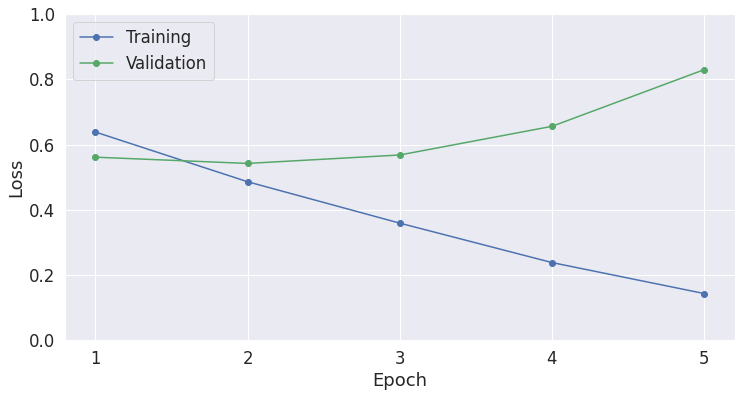

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Plot styling

sns.set(style = "darkgrid")

# Aumenttndo o tamanho do plot e da fonte

sns.set(font_scale = 1.5)
plt.rcParams['figure.figsize'] = (12,6)

# Curva de aprendizado

treino_loss = df_stats.groupby(['epoch']).mean()['Training Loss']
valida_loss = df_stats.groupby(['epoch']).mean()['Valid. Loss']


treino_valid = pd.merge(treino_loss, valida_loss, right_index = True,
               left_index = True)


plt.plot(treino_valid['Training Loss'], 'b-o', label = "Training")
plt.plot(treino_valid['Valid. Loss'], 'g-o', label = "Validation")

# Labels

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1,2,3,4,5])
plt.ylim((0, 1)) 

plt.show()




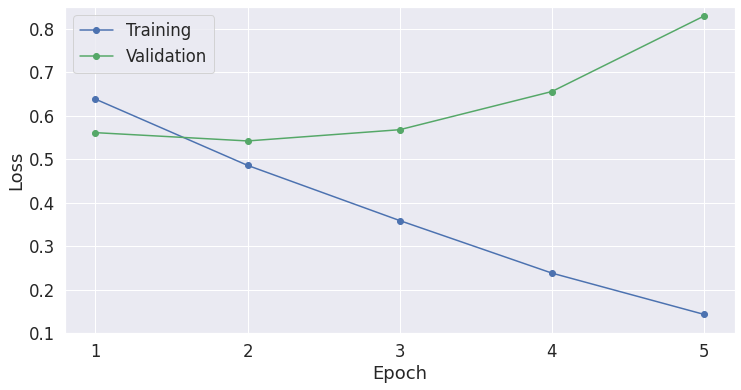

In [82]:
plt.plot(treino_valid['Training Loss'], 'b-o', label = "Training")
plt.plot(treino_valid['Valid. Loss'], 'g-o', label = "Validation")

# Labels

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1,2,3,4,5])
plt.ylim((0.1, 0.85)) 

plt.show()

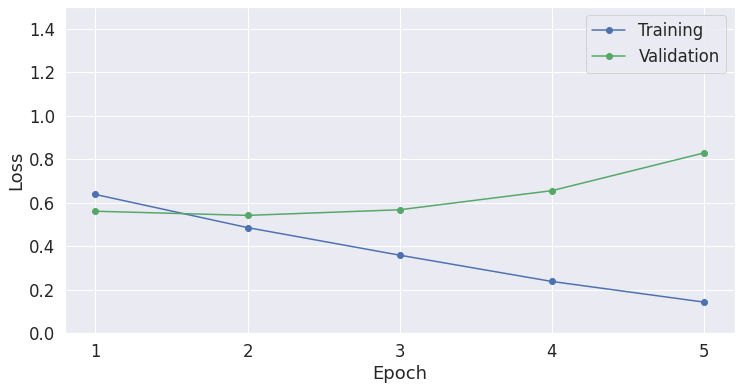

In [83]:

plt.plot(treino_valid['Training Loss'], 'b-o', label = "Training")
plt.plot(treino_valid['Valid. Loss'], 'g-o', label = "Validation")

# Labels

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1,2,3,4,5])
plt.ylim((0, 1.5)) 

plt.show()

### F1 Score

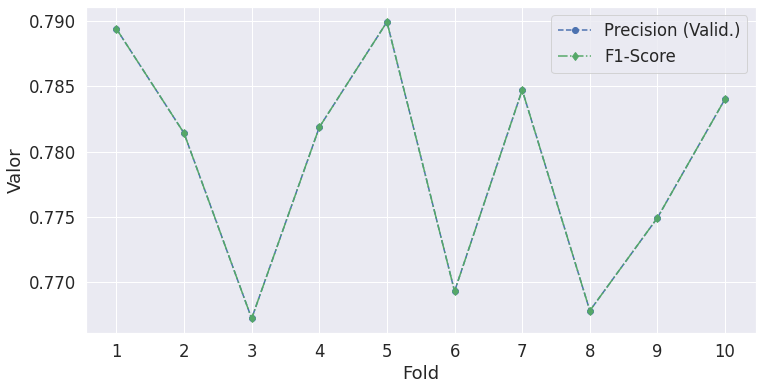

In [84]:
valid_acc = df_stats.groupby(['fold']).mean()['Valid. Accur.']
f1 = df_stats.groupby(['fold']).mean()['f1_score']


metricas = pd.merge(valid_acc, f1, right_index = True,
               left_index = True)


plt.plot(metricas['Valid. Accur.'], 'b--o', label = "Precision (Valid.)")
plt.plot(metricas['f1_score'], 'g-.d', label = "F1-Score")

# Labels

plt.xlabel("Fold")
plt.ylabel("Valor")
plt.legend()
plt.xticks(range(1,11))

plt.show()